<a href="https://colab.research.google.com/github/Harhsa/Harhsa/blob/main/World_Bank_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install ploty

In [1]:
!pip install plotly


#**World Banks data set project -4**

#Load the Data

In [2]:
import pandas as pd

# Load datasets
country_population = pd.read_csv('country_population.csv')
life_expectancy = pd.read_csv('life_expectancy.csv')
fertility_rate = pd.read_csv('fertility_rate.csv')
metadata_country = pd.read_csv('Metadata_Country.csv')


#Data Overview

In [3]:
# Display the first few rows of each dataset
print("Country Population Data:")
print(country_population.head())

print("\nLife Expectancy Data:")
print(life_expectancy.head())

print("\nFertility Rate Data:")
print(fertility_rate.head())

print("\nMetadata Country Data:")
print(metadata_country.head())


Country Population Data:
  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011      

#Handle Missing Values

In [4]:
# Check for missing values
print(country_population.isnull().sum())
print(life_expectancy.isnull().sum())
print(fertility_rate.isnull().sum())


Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64
Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64
Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64


#Merge DataFrames (If Required)

In [5]:
# Merging datasets on 'Country Code'
merged_data = pd.merge(country_population, life_expectancy, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, fertility_rate, on='Country Code', how='inner')


#Melt the Dataset

In [6]:
# Melt example for life expectancy
melted_life_expectancy = pd.melt(life_expectancy, id_vars=["Country Name", "Country Code"],
                                  value_vars=[str(year) for year in range(1960, 2017)],
                                  var_name="Year", value_name="Life Expectancy")


#1.What is the average life expectancy in each region?

In [22]:
import pandas as pd

# Load datasets
country_population = pd.read_csv('country_population.csv')
life_expectancy = pd.read_csv('life_expectancy.csv')
fertility_rate = pd.read_csv('fertility_rate.csv')
metadata_country = pd.read_csv('Metadata_Country.csv')

# Clean 'Country Code' columns
country_population['Country Code'] = country_population['Country Code'].str.strip().str.upper()
life_expectancy['Country Code'] = life_expectancy['Country Code'].str.strip().str.upper()
fertility_rate['Country Code'] = fertility_rate['Country Code'].str.strip().str.upper()
metadata_country['Country Code'] = metadata_country['Country Code'].str.strip().str.upper()

# Merge datasets on 'Country Code'
merged_data = pd.merge(country_population, life_expectancy, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, fertility_rate, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, metadata_country[['Country Code', 'Region']], on='Country Code', how='left')

# Check columns in merged_data
print("Columns in merged_data:")
print(merged_data.columns)

# Rename conflicting columns in merged_data
merged_data.rename(columns=lambda x: x + '_x' if x in ['2016'] else x, inplace=True)

# Add life expectancy for the year 2016
if '2016' in life_expectancy.columns:
    merged_data = pd.merge(merged_data, life_expectancy[['Country Code', '2016']], on='Country Code', how='left')
    merged_data.rename(columns={'2016': 'Life Expectancy'}, inplace=True)
else:
    print("2016 column not found in life_expectancy.")

# Calculate average life expectancy by region
if 'Region' in merged_data.columns and 'Life Expectancy' in merged_data.columns:
    average_life_expectancy = merged_data.groupby('Region')['Life Expectancy'].mean()
    print(average_life_expectancy)
else:
    print("Region or Life Expectancy column not found in merged_data.")


Columns in merged_data:
Index(['Country Name_x', 'Country Code', 'Indicator Name_x',
       'Indicator Code_x', '1960_x', '1961_x', '1962_x', '1963_x', '1964_x',
       '1965_x',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Region'],
      dtype='object', length=182)
Region
East Asia & Pacific           74.428812
Europe & Central Asia         77.563180
Latin America & Caribbean     74.920687
Middle East & North Africa    74.514566
North America                 80.739276
South Asia                    70.534500
Sub-Saharan Africa            61.644117
Name: Life Expectancy, dtype: float64


#2.What is the fertility rate trend in a specific country?

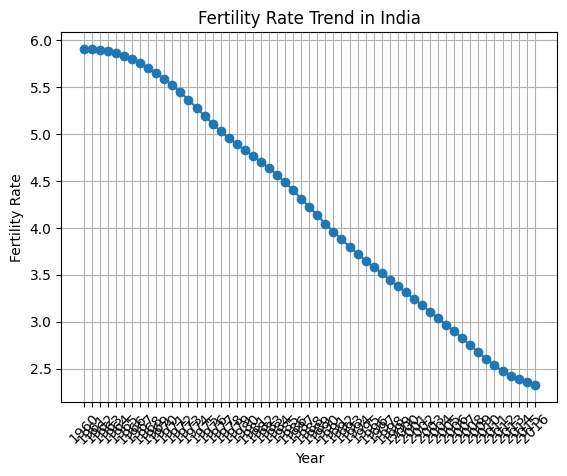

In [23]:
# Filter for a specific country (e.g., 'India')
india_fertility = fertility_rate[fertility_rate['Country Name'] == 'India']

# Plotting the trend
import matplotlib.pyplot as plt

plt.plot(india_fertility.columns[4:], india_fertility.iloc[0, 4:], marker='o')
plt.title('Fertility Rate Trend in India')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Animated Line Graph for Life Expectancy**

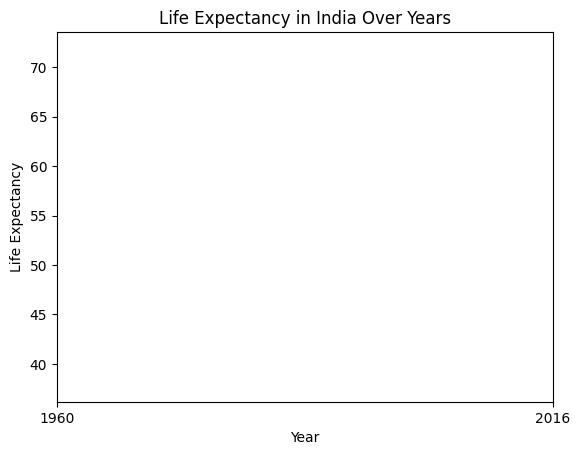

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example for a specific country (e.g., 'India')
india_life_expectancy = life_expectancy[life_expectancy['Country Name'] == 'India']

# Prepare data for animation
years = india_life_expectancy.columns[4:]
values = india_life_expectancy.iloc[0, 4:]

# Create figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], marker='o')

# Set limits
ax.set_xlim(years.min(), years.max())
ax.set_ylim(values.min() - 5, values.max() + 5)
ax.set_title('Life Expectancy in India Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy')

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    line.set_data(years[:i+1], values[:i+1])
    return line,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=len(years), init_func=init, blit=True, repeat=False)

plt.show()


 **Animated Bar Chart for Fertility Rate**

In [25]:
import plotly.express as px

# Prepare the data for animation
fertility_melted = pd.melt(fertility_rate, id_vars=["Country Name", "Country Code"],
                            value_vars=[str(year) for year in range(1960, 2017)],
                            var_name="Year", value_name="Fertility Rate")

# Create animated bar chart
fig = px.bar(fertility_melted, x='Fertility Rate', y='Country Name',
             color='Country Name', animation_frame='Year',
             range_x=[0, 10], title='Fertility Rate Over Years')
fig.show()


# ( Trail and error )What is the average life expectancy in each region?

In [9]:
# Calculate average life expectancy by region
if 'Region' in merged_data.columns:
    average_life_expectancy = merged_data.groupby('Region')['Life Expectancy'].mean()
    print(average_life_expectancy)
else:
    print("Region column not found in merged_data.")


Region column not found in merged_data.


In [10]:
# Check the contents of the metadata_country DataFrame
print(metadata_country.columns)
print(metadata_country.head())


Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')
  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  Unnamed: 5  
0  SNA data for 2000-2011 are updated from offici...        Aruba         NaN  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan         NaN  
2                                                NaN       Angola         NaN  
3                                                NaN      Albania         NaN  
4  WB-3 code changed from ADO to AND to align wit...      Andorra         NaN  


In [11]:
# Check unique 'Country Code' values in both DataFrames
print("Unique Country Codes in merged_data:", merged_data['Country Code'].unique())
print("Unique Country Codes in metadata_country:", metadata_country['Country Code'].unique())


Unique Country Codes in merged_data: ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CEB' 'CHE'
 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CSS'
 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAP'
 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH' 'EUU'
 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND'
 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX' 'IMN' 'IND'
 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN'
 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA'
 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC' 'MKD'
 'MLI' 'MLT' '

In [12]:
# Attempt to merge again
merged_data = pd.merge(merged_data, metadata_country[['Country Code', 'Region']], on='Country Code', how='left')

# Check the result of the merge
print("After merging with metadata:")
print(merged_data.head())
print("Columns in merged_data after merge:", merged_data.columns)


After merging with metadata:
  Country Name_x Country Code   Indicator Name_x Indicator Code_x     1960_x  \
0          Aruba          ABW  Population, total      SP.POP.TOTL    54211.0   
1    Afghanistan          AFG  Population, total      SP.POP.TOTL  8996351.0   
2         Angola          AGO  Population, total      SP.POP.TOTL  5643182.0   
3        Albania          ALB  Population, total      SP.POP.TOTL  1608800.0   
4        Andorra          AND  Population, total      SP.POP.TOTL    13411.0   

      1961_x     1962_x     1963_x     1964_x     1965_x  ...   2008   2009  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...  1.764  1.769   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  6.254  6.038   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  6.307  6.238   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...  1.650  1.646   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...  1.250  1.190   

    2010   2011

In [13]:
# Check for rows where 'Region' is NaN
missing_region = merged_data[merged_data['Region'].isnull()]
print("Rows with missing Region:")
print(missing_region)


Rows with missing Region:
                                        Country Name_x Country Code  \
5                                           Arab World          ARB   
34                      Central Europe and the Baltics          CEB   
47                              Caribbean small states          CSS   
59         East Asia & Pacific (excluding high income)          EAP   
60                          Early-demographic dividend          EAR   
61                                 East Asia & Pacific          EAS   
62       Europe & Central Asia (excluding high income)          ECA   
63                               Europe & Central Asia          ECS   
66                                           Euro area          EMU   
71                                      European Union          EUU   
72            Fragile and conflict affected situations          FCS   
93                                         High income          HIC   
96              Heavily indebted poor countries (HI

In [14]:
# Calculate average life expectancy by region
if 'Region' in merged_data.columns:
    average_life_expectancy = merged_data.groupby('Region')['Life Expectancy'].mean()
    print(average_life_expectancy)
else:
    print("Region column not found in merged_data.")


KeyError: 'Column not found: Life Expectancy'

In [15]:
# Display the first few rows of merged_data
print("First few rows of merged_data:")
print(merged_data.head())


First few rows of merged_data:
  Country Name_x Country Code   Indicator Name_x Indicator Code_x     1960_x  \
0          Aruba          ABW  Population, total      SP.POP.TOTL    54211.0   
1    Afghanistan          AFG  Population, total      SP.POP.TOTL  8996351.0   
2         Angola          AGO  Population, total      SP.POP.TOTL  5643182.0   
3        Albania          ALB  Population, total      SP.POP.TOTL  1608800.0   
4        Andorra          AND  Population, total      SP.POP.TOTL    13411.0   

      1961_x     1962_x     1963_x     1964_x     1965_x  ...   2008   2009  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...  1.764  1.769   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  6.254  6.038   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  6.307  6.238   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...  1.650  1.646   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...  1.250  1.190   

    2010   20

In [16]:
# Check the columns and first few rows of life_expectancy DataFrame
print("Columns in life_expectancy:")
print(life_expectancy.columns)
print(life_expectancy.head())


Columns in life_expectancy:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')
  Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      An

In [18]:
# Clean 'Country Code' columns by stripping whitespace and converting to upper case
merged_data['Country Code'] = merged_data['Country Code'].str.strip().str.upper()
metadata_country['Country Code'] = metadata_country['Country Code'].str.strip().str.upper()
life_expectancy['Country Code'] = life_expectancy['Country Code'].str.strip().str.upper()


In [19]:
# Re-merge datasets on 'Country Code'
merged_data = pd.merge(country_population, life_expectancy, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, fertility_rate, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, metadata_country[['Country Code', 'Region']], on='Country Code', how='left')

# Check the result of the merge
print("After merging with metadata:")
print(merged_data.head())
print("Columns in merged_data after merge:", merged_data.columns)


After merging with metadata:
  Country Name_x Country Code   Indicator Name_x Indicator Code_x     1960_x  \
0          Aruba          ABW  Population, total      SP.POP.TOTL    54211.0   
1    Afghanistan          AFG  Population, total      SP.POP.TOTL  8996351.0   
2         Angola          AGO  Population, total      SP.POP.TOTL  5643182.0   
3        Albania          ALB  Population, total      SP.POP.TOTL  1608800.0   
4        Andorra          AND  Population, total      SP.POP.TOTL    13411.0   

      1961_x     1962_x     1963_x     1964_x     1965_x  ...   2008   2009  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...  1.764  1.769   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  6.254  6.038   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  6.307  6.238   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...  1.650  1.646   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...  1.250  1.190   

    2010   2011

In [20]:
# Calculate average life expectancy by region
if 'Region' in merged_data.columns and 'Life Expectancy' in merged_data.columns:
    average_life_expectancy = merged_data.groupby('Region')['Life Expectancy'].mean()
    print(average_life_expectancy)
else:
    print("Region or Life Expectancy column not found in merged_data.")


Region or Life Expectancy column not found in merged_data.


In [21]:
import pandas as pd

# Load datasets
country_population = pd.read_csv('country_population.csv')
life_expectancy = pd.read_csv('life_expectancy.csv')
fertility_rate = pd.read_csv('fertility_rate.csv')
metadata_country = pd.read_csv('Metadata_Country.csv')

# Clean 'Country Code' columns
country_population['Country Code'] = country_population['Country Code'].str.strip().str.upper()
life_expectancy['Country Code'] = life_expectancy['Country Code'].str.strip().str.upper()
fertility_rate['Country Code'] = fertility_rate['Country Code'].str.strip().str.upper()
metadata_country['Country Code'] = metadata_country['Country Code'].str.strip().str.upper()

# Merge datasets on 'Country Code'
merged_data = pd.merge(country_population, life_expectancy, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, fertility_rate, on='Country Code', how='inner')
merged_data = pd.merge(merged_data, metadata_country[['Country Code', 'Region']], on='Country Code', how='left')

# Check columns in merged_data
print("Columns in merged_data:")
print(merged_data.columns)

# Add life expectancy for the year 2016
if '2016' in life_expectancy.columns:
    merged_data = pd.merge(merged_data, life_expectancy[['Country Code', '2016']], on='Country Code', how='left')
    merged_data.rename(columns={'2016': 'Life Expectancy'}, inplace=True)
else:
    print("2016 column not found in life_expectancy.")

# Calculate average life expectancy by region
if 'Region' in merged_data.columns and 'Life Expectancy' in merged_data.columns:
    average_life_expectancy = merged_data.groupby('Region')['Life Expectancy'].mean()
    print(average_life_expectancy)
else:
    print("Region or Life Expectancy column not found in merged_data.")


Columns in merged_data:
Index(['Country Name_x', 'Country Code', 'Indicator Name_x',
       'Indicator Code_x', '1960_x', '1961_x', '1962_x', '1963_x', '1964_x',
       '1965_x',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Region'],
      dtype='object', length=182)


MergeError: Passing 'suffixes' which cause duplicate columns {'2016_x'} is not allowed.